In [1]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets

In [2]:
print(datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X,Y = datasets.load_boston(return_X_y=True)

In [6]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15)


In [11]:
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(430, 13) (76, 13) (430,) (76,)


In [12]:
model = LinearRegression(fit_intercept=True)

In [13]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model.coef_

array([-1.17923282e-01,  5.93646898e-02,  5.85541595e-03,  1.13113001e+00,
       -1.62871108e+01,  3.47384095e+00, -2.44843390e-03, -1.49682170e+00,
        3.26849754e-01, -1.30674696e-02, -9.31827094e-01,  9.26748986e-03,
       -5.05516821e-01])

In [16]:
model.score(x_test, y_test)

0.7393615376695345

In [17]:
y_pred = model.predict(x_test)
y_pred

array([28.13892427, 23.68328342, 32.32486259, 30.89769089, 22.96576116,
       31.15042707, 17.74302013, 15.61526779, 14.06857981, 23.66387458,
       24.47165169, 27.56682138, 25.21127197, 25.00895921, 25.1711672 ,
       18.80990111, 19.46475031, 21.46881292, 21.56911438, 18.42715127,
       10.37385568, 18.07791656, 15.94697456, 27.39214298, 31.15889447,
       20.34726623, 34.2423336 , 24.23018198, 33.97619025, 19.80766754,
       22.93520298, 38.39910723, 18.90394444, 31.3239033 , 17.19942731,
       26.56232212, 37.59306543, 11.81906015, 38.87512913, 38.33258845,
       20.43544439, 19.08964395, 15.3679316 , 39.179265  , 13.69881042,
       29.57327243, 20.54773645, 39.14109211, 14.76731553, 13.16081317,
       19.77467923, 26.84190819, 23.31094623, 32.7254766 , 21.74518724,
       19.68627019, 25.17869436,  5.92064762, 16.83021144, 21.06148505,
       24.13531095, 20.48923001, 16.59741411, 25.04497869, 26.12159276,
       18.09834518, 24.63625252, 19.49866662, 21.50242296, 18.04

In [18]:
r2_score(y_test,y_pred)

0.7393615376695345

In [19]:
mean_squared_error(y_test, y_pred)

27.47207864273008

In [20]:
import seaborn as sns

In [21]:
import pandas as pd

<AxesSubplot:>

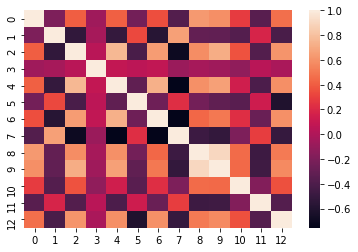

In [23]:
sns.heatmap(pd.DataFrame(x_train).corr())

In [24]:
X,Y =datasets.load_iris(return_X_y=True)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.15)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression().fit(x_train,y_train)

In [29]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1,
       0])

In [31]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

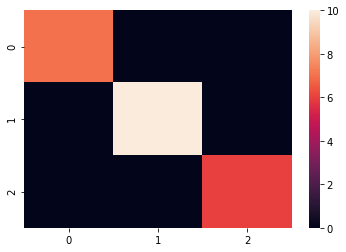

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred))

![](data/confu.jpg)

In [33]:
from sklearn import metrics

In [34]:
metrics.adjusted_rand_score(y_test,y_pred)

1.0

In [35]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [ ]:
#aquellos que son positivos en la realidad y en la prediccion son positivos (verdaderos - positivos)
#aquellos que son negativos en la realidad y en la prediccion son positivos (falsos - positivos)
#aquellos que son positivos en la realidad y en la prediccion son negativos (falsos - negativos)
#aquellos que son negativos en la realidad y en la prediccion son negativos (Verdaderos - negativos)

In [37]:
from sklearn.svm import SVC

In [38]:
clf = SVC(kernel = 'linear')
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [39]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid_param = {
    'C' :[i for i in range(1,10,1)],
    'kernel':['linear'],
    'max_iter': [i for i in range(1,10,1)]
}

In [44]:
clf = SVC()

In [45]:
clf_grid = GridSearchCV(clf, grid_param)
grid_opt = clf_grid.fit(x_train,y_train)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_it

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_it

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_it

In [46]:
best = grid_opt.best_params_

In [47]:
best

{'C': 8, 'kernel': 'linear', 'max_iter': 9}

In [48]:
clf_best = SVC(**best)
clf_best.fit(x_train,y_train)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=9, probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [49]:
y_pred = clf_best.predict(x_test)


<AxesSubplot:>

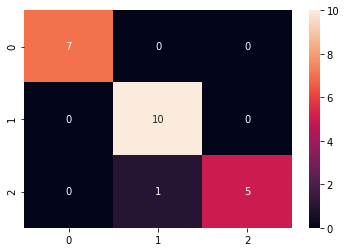

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [51]:
metrics.accuracy_score(y_test,y_pred)

0.9565217391304348

In [53]:
features, true_labes = datasets.make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=(1234))

In [54]:
features

array([[-1.99734742,  4.65997821],
       [-3.96878176,  4.34198591],
       [-3.3739094 , -0.12623547],
       [ 4.6606831 , -6.42355412],
       [-0.3678188 ,  5.44572445],
       [-8.2837586 ,  4.57665435],
       [ 7.19776842, -4.89079831],
       [-4.61890989, -1.15850503],
       [-3.4195377 ,  7.35915434],
       [-1.15246254,  4.16589816],
       [-0.9729361 ,  6.11891053],
       [-6.09900354,  3.03444173],
       [-5.70765771,  2.12942728],
       [-0.74668529,  6.50058829],
       [ 1.70542257, -3.83463564],
       [-1.82049209,  4.53444754],
       [-3.13621977,  7.7386793 ],
       [ 3.64270435, -3.73854504],
       [-2.37923848,  4.38550408],
       [-4.49447214,  5.45572144],
       [ 4.72811347, -2.95404319],
       [ 5.52444162, -3.43221863],
       [-4.87403505,  2.25903806],
       [-6.64991682,  1.06787713],
       [-6.54225907,  1.51561545],
       [-5.390811  ,  4.9697981 ],
       [ 4.63451631, -5.62120422],
       [ 3.40617857, -1.77193264],
       [-7.9628966 ,

In [57]:
import matplotlib.pyplot as plt

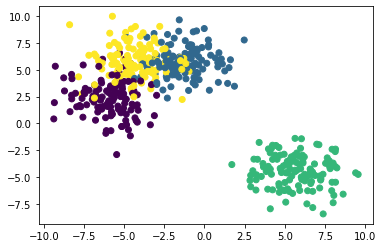

In [63]:
plt.scatter(features[:,0],features[:,1], c = true_labes)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scaled_f = scaler.fit_transform(features)
scaled_f

array([[-1.09371316e-01,  5.18926182e-01],
       [-5.28157859e-01,  4.47339737e-01],
       [-4.01790709e-01, -5.58546522e-01],
       [ 1.30497637e+00, -1.97619927e+00],
       [ 2.36785107e-01,  6.95813422e-01],
       [-1.44477689e+00,  5.00168311e-01],
       [ 1.84392264e+00, -1.63114519e+00],
       [-6.66262846e-01, -7.90931107e-01],
       [-4.11483408e-01,  1.12656487e+00],
       [ 7.01053270e-02,  4.07698854e-01],
       [ 1.08241651e-01,  8.47361113e-01],
       [-9.80675195e-01,  1.52985316e-01],
       [-8.97542643e-01, -5.07515924e-02],
       [ 1.56303509e-01,  9.33284432e-01],
       [ 6.77198246e-01, -1.39338179e+00],
       [-7.18024093e-02,  4.90666712e-01],
       [-3.51298935e-01,  1.21200355e+00],
       [ 1.08872985e+00, -1.37174987e+00],
       [-1.90495417e-01,  4.57136550e-01],
       [-6.39828865e-01,  6.98063946e-01],
       [ 1.31930042e+00, -1.19514276e+00],
       [ 1.48846229e+00, -1.30278965e+00],
       [-7.20458404e-01, -2.15736054e-02],
       [-1.

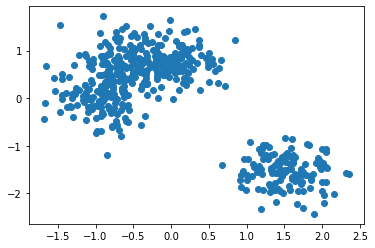

In [62]:
plt.scatter(scaled_f[:,0],scaled_f[:,1])

In [64]:
from sklearn.cluster import KMeans

In [65]:
kmeans = KMeans(init = 'random',
               n_clusters = 4,
               n_init = 10,
               max_iter = 100,
               random_state=420)

In [66]:
kmeans.fit(scaled_f)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=100, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=420,
       tol=0.0001, verbose=0)

In [68]:
kmeans.labels_

array([0, 2, 3, 1, 0, 3, 1, 3, 2, 0, 0, 3, 3, 0, 1, 0, 2, 1, 0, 2, 1, 1,
       3, 3, 3, 2, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 0, 0, 2, 1, 1, 3,
       2, 1, 2, 3, 2, 3, 0, 3, 3, 1, 2, 0, 3, 3, 0, 2, 1, 2, 3, 3, 0, 2,
       2, 1, 0, 1, 1, 2, 2, 2, 3, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 3, 1, 2,
       0, 0, 2, 3, 0, 1, 0, 1, 0, 0, 3, 0, 1, 3, 1, 0, 2, 1, 2, 0, 2, 3,
       1, 0, 0, 0, 2, 3, 2, 0, 1, 1, 0, 3, 3, 0, 2, 0, 0, 1, 0, 2, 0, 2,
       2, 3, 3, 1, 3, 0, 1, 0, 1, 2, 3, 2, 2, 1, 0, 1, 2, 0, 3, 0, 3, 1,
       1, 2, 1, 2, 2, 2, 1, 0, 0, 3, 2, 2, 2, 0, 3, 3, 1, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 3, 2, 0, 1, 0, 2, 3, 2,
       3, 2, 3, 3, 0, 2, 3, 2, 2, 1, 0, 0, 1, 3, 2, 0, 1, 2, 0, 1, 1, 3,
       1, 3, 0, 1, 2, 3, 2, 0, 2, 2, 0, 1, 0, 3, 2, 2, 2, 3, 2, 1, 0, 2,
       0, 3, 3, 1, 1, 2, 1, 3, 3, 3, 3, 3, 1, 1, 2, 3, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 0, 3, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 3, 3, 3, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 3, 0, 1,

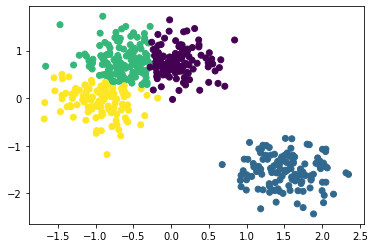

In [69]:
plt.scatter(scaled_f[:,0],scaled_f[:,1], c = kmeans.labels_)

In [70]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(scaled_f,kmeans.labels_)

0.5067994391032876

In [73]:
metrics.accuracy_score(true_labes,kmeans.labels_)

0.02

<AxesSubplot:>

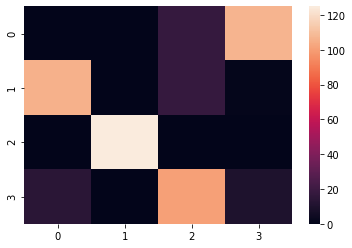

In [75]:
sns.heatmap(confusion_matrix(true_labes,kmeans.labels_))


In [76]:
from yellowbrick.cluster import KElbowVisualizer


C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


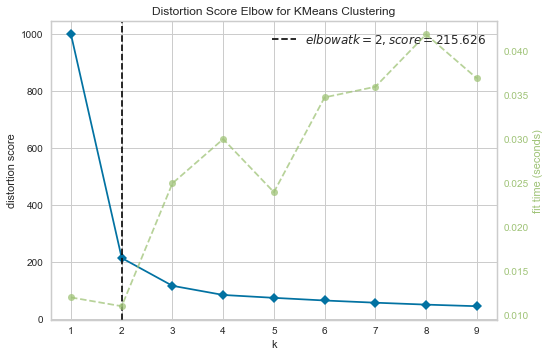

In [77]:
visual = KElbowVisualizer(kmeans , k =(1,10))

visual.fit(scaled_f)
visual.poof();

In [78]:
from sklearn.metrics import homogeneity_score

In [80]:
homogeneity_score(true_labes,kmeans.labels_)

0.7416851906575243